# Funciones de activacion comunmente usadas


## 1. Funcion Sigmoide o Logistica

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Esta funcion pasara cualquier funcion a intervalo [0, 1]

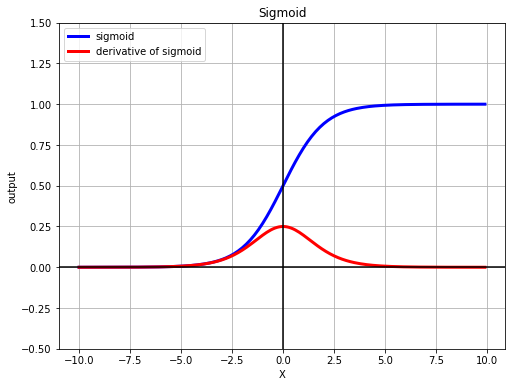

In [ ]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='derivative of sigmoid', c='red', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('output')
plt.title('Sigmoid')
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()
#Entrada de sigmoide en NN es Th*x (g(Th*x))

## Problemas con sigmoides:
**Ver libro: Deep learning (Goodfellow)**
#### 1. Vanishing de gradiente (vanishing gradient)
En la figura anterior, cuando la salida está cerca de 0 y 1, la derivada es casi cero. Es decir, cuando suceda el backpropagation, las ponderaciones se actualizarán muy, muy lentamente, casi en magnitud insignificante, por lo tanto, el aprendizaje será casi nulo. Así que estaremos atascados con los pesos iniciales elegidos :O..

Si nos fijamos en la derivada de la sigmoide, el valor máximo es 0.25. Por lo tanto, cada gradiente se reducirá al menos al 25% de su valor (en el peor de los casos, en 0%) y, por lo tanto, en una red profunda, el aprendizaje se pierde. Los gradientes que se propagan a las capas poco profundas (capas cercanas a la capa de entrada) no serán tan importantes para actualizar los pesos.

#### 2. No centrado en cero
En el algoritmo de back-propagation:

$$f=\sum w_ix_i+b$$ $$\frac{df}{dw_i}=x_i$$ $$\frac{dL}{dw_i}=\frac{dL}{df}\frac{df}{dw_i}=\frac{dL}{df}x_i$$


debido a que $x_i>0 $, el gradiente $\dfrac{dL}{dw_i}$ siempre tiene el mismo signo que $\dfrac{dL}{df}$ (todos positivos o todos negativos).

Por lo tanto, si hay un peso que debe actualizarse en positivo y otro en negativo, eso no sucederá, y tomará tiempo para converger.


#### 3. Computacionalmente caro
El cálculo del sigmoide es computacionalmente costoso (la exponencial es una operacion no tan facil como sumas o multiplicaciones)

### Por lo tanto, se recomienda evitar siempre el uso de funcion Sigmoide (Si usa tipicamente en capa final para tareas de clasificacion)


## 2. Tangente Hiperbolica 

$$f = tanh(x)$$

normalizara la salida a [-1, 1]. Esta es similar a la sigmoide, con la diferencia que es centrada en cero, porlo tanto es mejor que la sigmoide.

En realidad, tanh es una version escalada de la sigmoide:

$$tanh(x) = 2\sigma(2x) - 1$$

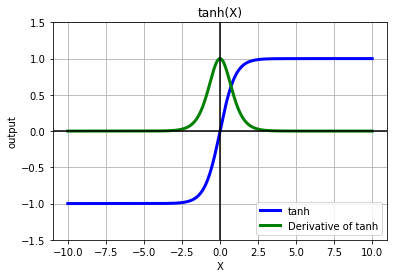

In [ ]:
def grad_tanh(x):
    return 1 - np.tanh(x)**2

X = np.arange(-10, 10, 0.01)
fig, ax = plt.subplots()
ax.plot(X, np.tanh(X), label='tanh',  c='blue', linewidth=3)
ax.plot(X, grad_tanh(X), label='Derivative of tanh', c='green', linewidth=3)
plt.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylim([-1.5, 1.5])
plt.ylabel('output')
plt.title('tanh(X)')
plt.show()